# Bellabeat Case Study: How Can A Wellness Technology Company Play It Smart?

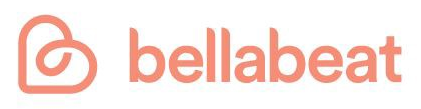

## Introduction
Welcome to the Bellabeat data analysis case study! This case study is the Capstone Project of **Google Data Analytics Professional Certificate**. The **6 steps of the Data Analysis process (ask-prepare-process-analyze-share-act)** are used as framework for this analysis.

----

# STEP 1: ASK

#### 1.0 Background

Bellabeat is a high-tech manufacturer of health-focused smart products for women. Through her beautifully designed technology, Bellabeat has informed, inspired and empowered women around the world with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

The co-founder and Chief Creative Officer, Urška Sršen is confident that an analysis of non-Bellebeat consumer data (in this case: the FitBit fitness tracker usage data) would reveal more growth opportunities for the company.

#### 1.2 Business Task

`Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit product and discover trends and insights to inform Bellabeat marketing strategy.`


#### 1.3 Business Objectives
1. What are the trends identified?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


#### 1.4 Deliverables
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of the analysis
5. Supporting visualizations and key findings
6. High-level content recommendations based on the analysis


#### 1.5 Key Stakeholders
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
2. Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
3. Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.


----

# STEP 2: PREPARE


#### 2.1 Data Source:
1. The publicly-available [FitBit Fitness Tracker Data found on Kaggle](https://www.kaggle.com/arashnic/fitbit) will be used in this analysis. The dataset, stored in 18 csv files, contains personal fitness tracker from 30 fitbit users. 
2. The datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between March 12 2016 to May 12 2016.
3. Attributes of collected data include (1) physical activity recorded in minutes, (2) heart rate, (3) sleep monitoring, (4) daily activity and (5) steps.

    
#### 2.2 Limitations of the Data
1. The data collected dates back to 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.
2. The sample size of 30 female FitBit users seems to small and is not representative of the entire female population. 
3. As data is collected in a survey, we may be unable to ascertain the integrity or accuracy of data.


#### 2.3 Does the Data ROCCC?

A good data is one that is ROCCC, i,e **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited. For our data,:
1. Reliability is LOW, as it contains only has 30 respondents
2. Originality is also LOW, as the data is from a third party provider (Amazon Mechanical Turk)
3. Comprehensive: MEDIUM, since the attributes match most of Bellabeat's products' attributes
4. Currency level is also LOW as our data is about 5-6 years old and thus is not relevant
5. Citation is LOW since the data collected is from a third-party, hence the original data sources/reference is unknown

`Overall, the dataset is considered bad quality data. It is not adviseable to produce business recommendations based on the analysis of this data`.


#### 2.4 Data Selection
Of the 18 csv files, the `dailyActivity_merged.csv` will be used for analysis. 
    
----

# STEP 3: PROCESS

`Tools`: The Python Programming Language will be used to prepare and process and analyze the data. The Python Libraries Numpy & Pandas allows for quick, easy cleaning & manipulation of our data. The Matplotlib library is also good for in-notebook visualization of insights generated.


#### 3.1 Install needed Libraries

In [1]:
# import packages
import numpy as np # for data arrays
import pandas as pd # for data structure and data analysis
import matplotlib.pyplot as plt # for data visualization
import datetime as dt # for date time

%matplotlib inline

#### 3.2 Load and Get familiar with the dataset

In [2]:
# !dir "./data"

In [3]:
# import the fitbase data
daily_activity = pd.read_csv("data/dailyActivity_merged.csv")

In [4]:
# view the first 10 rows of the data
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [5]:
# show basic information of data
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

    - There are 940 rows and 15 coloumns

#### 3.3 Data Cleaning

##### Steps
1. Check for null or missing values

In [6]:
# check for missing data values
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [7]:
# count distinct value of "Id" to confirm whether data set has 30 IDs
print(f"number of unique customerid: {daily_activity.Id.nunique()}")

number of unique customerid: 33


From the above, we observe that:
- The data set has 940 rows and 15 columns. 
- There are no null/missing values.
- *ActivityDate* coloumn is incorrectly classified as an `object` data type, instead of  `datetime64` data type; we'll correct this as we proceed
- There are 33 unique IDs, instead of 30 unique IDs (i.e 30 Fitbit users) as stated in the Case Study

#### 3.4 Data Manipulation (Feature Engineering)
Moving on, the following data manipulation will be performed:

- Conversion of *`ActivityDate`* to the `datatime64` data type. We'll also convert the column to the `yyyy-mm-dd` format.
- Creation of a new column *`DayOfTheWeek`* by separating the date into day of the week for further analysis.
- Summation of *`VeryActiveMinutes`*, *FairlyActiveMinutes*, *LightlyActiveMinutes* and *SedentaryMinutes* columns to create a new column called *`TotalMins`*
- Then we create a new column *`TotalHours`* from *`TotalMins`* to get number of hours.

In [8]:
# convert "ActivityDate" to datatime type and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

# print the first 5 rows of "ActivityDate" to confirm the change in data type and format
daily_activity["ActivityDate"].head()

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [9]:
# create day of the week column
daily_activity["DayOfTheWeek"] = daily_activity["ActivityDate"].dt.day_name()

# create TotalMinutes column
minutes = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
daily_activity["TotalMinutes"] = daily_activity[minutes].sum(axis=1)
# create TotalHours column
daily_activity["TotalHours"] = round(daily_activity.TotalMinutes / 60).astype(int)

In [10]:
# confirm the date range
print(f"""First recorded activity: {daily_activity['ActivityDate'].dt.date.min()}, 
Last rcorded activity: {daily_activity['ActivityDate'].dt.date.max()}""")

First recorded activity: 2016-04-12, 
Last rcorded activity: 2016-05-12


    Data cleaning and Manipulation is completed
    Next, We proceed to analyzing our data

----

# STEP 4: ANALYZE

#### 4.1 Summary Statistics

Pulling the statistics of df_activity for analysis:
* count - no. of rows
* mean (average)
* std (standard deviation)
* min and max
* percentiles 25%, 50%, 75%

In [11]:
# summary statistics
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


In [12]:
active_hours = round(daily_activity[minutes[:-1]].sum(axis=1).mean()/60, 2)
active_hours

3.79

Our statistical findings tells us that:

- On average, users logged 7,637 steps and covered ~5.5km; which is not adequate. According to a CDC research, an adult female should aim at least 10,000 steps or 8km per day to benefit from general health, weight loss and fitness improvement. [Source: Medical News Today article](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day)

- Most users were largely sedentary users, as they logged an average of 991 minutes (about 16 hours 30 minutes), making up 81% of the total average time Users spend on the app (20 hours). That's alot of inactivity!

- Users were most active for an average of 21 minutes. 

- The average calories burned is 2,303 calories, equivalent to about 0.6 pound.

----

# STEP 5: SHARE

Here, we will create visualizations to communicate our findings/insights

#### Which day of the week do users most use the FitBit App?

In [23]:
import seaborn as sns
plt.style.use("fivethirtyeight")

In [16]:
dayOfWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

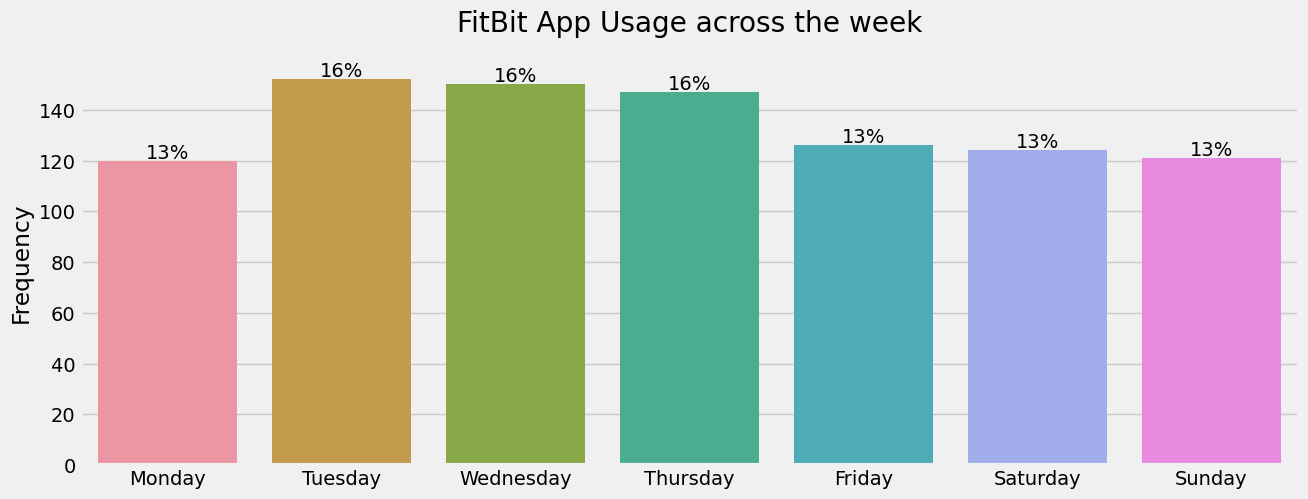

In [24]:
# plot of frequency of app usage across the week
plt.figure(figsize=(14, 5))
days = sns.countplot(x="DayOfTheWeek", data=daily_activity, order=dayOfWeek)
days.set_title("FitBit App Usage across the week", y=1.05)
days.set_ylabel("Frequency")
days.set_xlabel("")

def add_labels(ax, space):
    for rect in ax.patches:
        width = rect.get_width()
        height = rect.get_height()
        total = daily_activity.shape[0]
        
        ax.text(rect.get_x() + width/2,
               height + space,
               '{}%'.format(int(np.round(height/total*100))),
                ha="center")


add_labels(days, 1)

plt.show()

From the plot, we discover that:
- Users prefer or remember to track their activity on the app during the midweek, from Tuesday to Thursday. The frequency dropped on Friday through the weekend and Monday. 

#### Calories Burned per Steps Taken

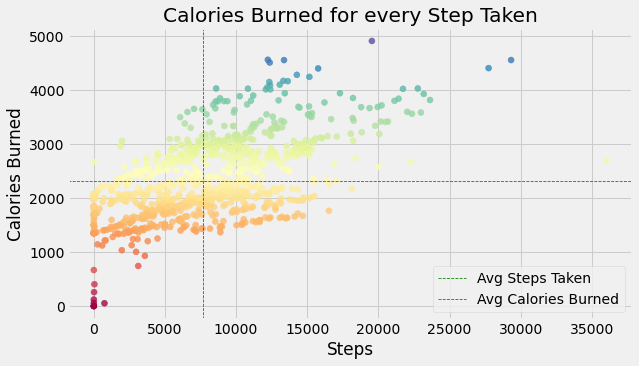

In [19]:
# plot scatter plot of calories against steps
plt.figure(figsize=(9, 5))
plt.scatter(daily_activity.TotalSteps, daily_activity.Calories, 
            alpha = 0.8, cmap = "Spectral",
            c = daily_activity.Calories)

mean_calories = round(daily_activity.Calories.mean())
mean_steps = round(daily_activity.TotalSteps.mean())

plt.axvline(mean_steps, color = "g", label = "Avg Steps Taken", linewidth=0.8, linestyle='--')
plt.axhline(mean_calories, color = "r", label = "Avg Calories Burned", linewidth=0.8, linestyle='--')

plt.xlabel("Steps")
plt.ylabel("Calories Burned")
plt.title("Calories Burned VS Steps Taken")
plt.legend()

plt.show()

- There is a positive correlation between number of steps taken and calories burned. Meaning the more steps taken by a Fitbit user, the higher the number of calories the user body burns

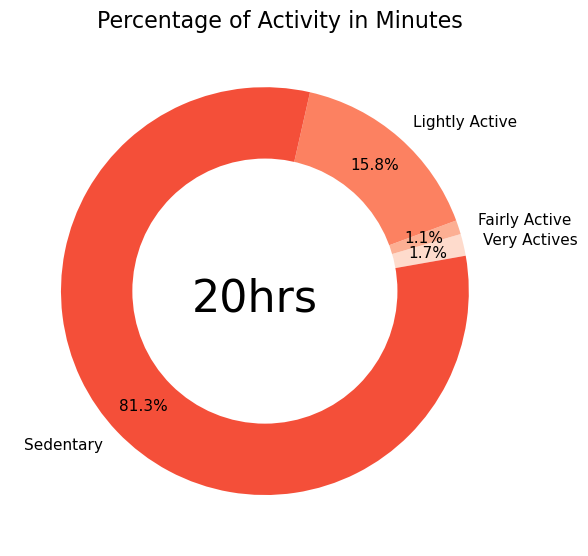

In [34]:
plt.style.use("default")

# plot of tweet sentiment distribution
plt.figure(figsize=(6,6))

minutes_sum = daily_activity[minutes].mean()
activity_label = ['Very Active', 'Fairly Active', 'Lightly Active', 'Sedentary']

sns.set_palette("Reds")
plt.pie(minutes_sum,
#         labels= minutes_sum.index,
        labels = activity_label,
        autopct='%1.1f%%', startangle=10, 
        pctdistance=0.82, textprops={"fontsize": 11})

centreCircle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centreCircle)

plt.tight_layout()
plt.title("Percentage of Activity in Minutes", x=0.53, fontsize= 16)
plt.annotate(str(round(daily_activity.TotalMinutes.mean()/60)) + 'hrs', (-0.36,-0.1), fontsize= 32)

plt.show()

- The pie plot tells the average hours spent on the FitBit app is about 20 hours
- Also, we see that a larger proportion of the users are mostly Sedentary (about 81%) or Lightly active users (approx. 16%).

------

# STEP 6: ACT

As a final step, we will be acting on the findings from our analysis. 

We will review the business questions, share insights and provide high-level business recommendations based on the results of our analysis

**1. What are the trends identified?**

- Only about 19% of users are Lightly to Very active on the Fitness App. A whooping 81% are Sedentary users.

- Users prefer to track their activities during weekdays (between Tuesdays and Thursdays). App usage dips on weekends - perhaps because users spend more time outdoor on weekdays and relax at home on weekends. 

**2. How could these trends apply to Bellabeat customers?**

- Both companies share huge similarities. They manufacure products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health and fitness we discovered from the FitBit Fitness data can very well be transfered to Bellabeat customers.

**3. How could these trends help influence Bellabeat marketing strategy?**

- Perhaps the Bellabeat marketing team launch an educational section on the Bellabeat app. Through the app, they could teach users about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and offer advise on calories intake and give burnt rate information.

- On weekends, Bellabeat app can also prompt notification to encourage users to exercise.

-----

                                                                                                    Author: Ayomide Aderonmu

                                                                                                   Date: 10th February, 2022